import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [221]:
heart = pd.read_csv("heart-disease.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [222]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart.drop("target", axis = 1)
y = heart["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [223]:
clf.score(x_train, y_train)

1.0

In [224]:
clf.score(x_test, y_test)

0.8524590163934426

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart.drop("target", axis = 1)
y = heart["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [226]:
clf.score(x_test, y_test)

0.8524590163934426

In [227]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [228]:
clf_score = clf.score(x_test, y_test)
clf_cross_val_score =np.mean(cross_val_score(clf, x, y))
clf_score, clf_cross_val_score


(0.8524590163934426, 0.8183606557377049)

In [229]:
cross_val_score(clf, x, y, scoring = None) 

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart.drop("target", axis = 1)
y = heart["target"]
cross_val_score(clf, x, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(x_test)
y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

In [ ]:
tpr

In [232]:
thresholds

array([2, 1, 0], dtype=int64)

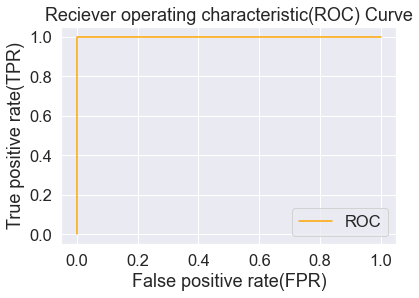

In [233]:
import matplotlib.pyplot as plt
def Plot_roc_curve(fpr, tpr): 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plt.plot([0, 1], [0, 1], color = "green", linestyle = "--", label = "Guessing")
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("Reciever operating characteristic(ROC) Curve")
    plt.legend()
    plt.show()
Plot_roc_curve(fpr, tpr)

In [234]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.5829741379310345

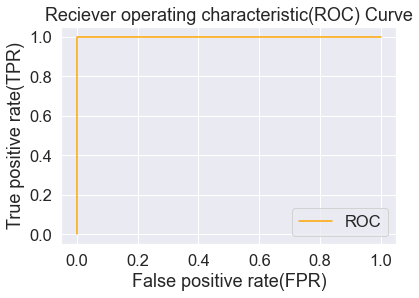

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
Plot_roc_curve(fpr, tpr)

In [236]:
roc_auc_score(y_test, y_test)

1.0

In [237]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [238]:
pd.crosstab(y_test,
           y_preds,
           rownames= ["Actual labels"],
           colnames= ["Pridicted value"])

Pridicted value,0,1
Actual labels,,
0,24,5
1,4,28


In [239]:
24 + 5 + 4 + 28

61

In [240]:
len(y_preds)

61

<AxesSubplot:>

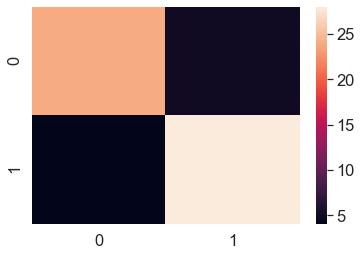

In [241]:
import seaborn as sns
sns.set(font_scale = 1.5)
con_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(con_mat)

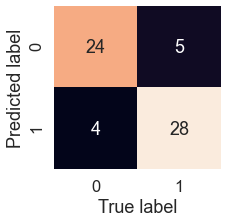

In [242]:
def plot_con_mat(con_mat):
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(con_mat,
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_con_mat(con_mat)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [245]:
disease_true = np.ones(10000)
disease_true[2] = 0
disease_preds = np.ones(10000)
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.0,0.99990,0.9999,0.499950,0.99980
recall,0.0,1.00000,0.9999,0.500000,0.99990
f1-score,0.0,0.99995,0.9999,0.499975,0.99985
support,1.0,9999.00000,0.9999,10000.000000,10000.00000
